In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from chronos import ChronosPipeline

# Load the Dataset

10000
200
[0.0, 0.0, 0.9092974268256817, 0.0, 0.0, -0.9589242746631385, 0.0, 0.0, 0.9893582466233818, 0.0]
[0.0, 0.0, 0.9948267913584063, 0.0, 0.0, -0.9705352835374847, 0.0, 0.0, 0.926818505417785, 0.0]


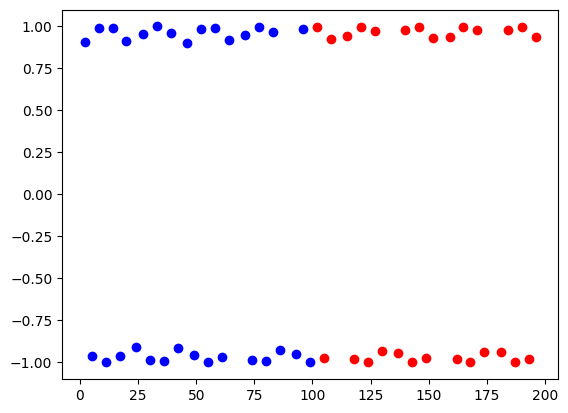

In [27]:
filename = "sin_data.xlsx"

# Load data
data = pd.read_excel(filename)

print(len(data))

# take only the first 200 data points

data = data.iloc[:200]
print(len(data))

# Split the data 50/50

train_data = data.iloc[:int(len(data) / 2)]
test_data = data.iloc[int(len(data) / 2):]

anomalies_train = []

for i in train_data["Sin(X)"]:
    if i > 0.9 or i < -0.9:
        anomalies_train.append(i)
    else:
        anomalies_train.append(0.0)

print(anomalies_train[:10]) 


anomalies_test = []

for i in test_data["Sin(X)"]:
    if i > 0.9 or i < -0.9:
        anomalies_test.append(i)
    else:
        anomalies_test.append(0.0)

print(anomalies_test[:10]) 

# plot the anomalies

index = 0
for i, value in enumerate(anomalies_train):
    if(value != 0):
        plt.scatter(i, value, color="blue", label="Anomaly")
    index += 1

for i, value in enumerate(anomalies_test):
    if(value != 0):
        plt.scatter(index + i, value, color="red", label="Anomaly")


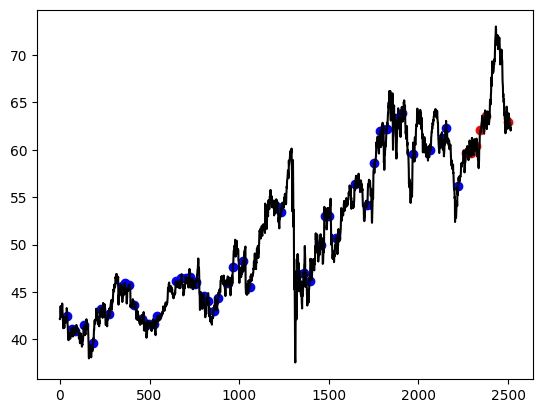

In [28]:
# load the csv file (coca cola data)
data_main = pd.read_csv("cocacola_stock.csv")


# split the data train and test 90/10

train_data = data_main.iloc[:int(len(data_main) * 0.90)]
test_data = data_main.iloc[int(len(data_main) * 0.90):]

train_forcast = train_data["Close"]
test_forcast = test_data["Close"]

train_anomalies = []
test_anomalies = []

for i, data in enumerate(train_forcast):
    if train_data.iloc[i]["GoldenCross"] == 1:
        train_anomalies.append(data)
    else:
        train_anomalies.append(0.0)

for i, data in enumerate(test_forcast):
    if test_data.iloc[i]["GoldenCross"] == 1:
        test_anomalies.append(data)
    else:
        test_anomalies.append(0.0)
        

# plot the anomalies

index = 0
for i, value in enumerate(train_anomalies):
    if(value != 0):
        plt.scatter(i, value, color="blue", label="Anomaly")
    index += 1
    
for i, value in enumerate(test_anomalies):
    if(value != 0):
        plt.scatter(index + i, value, color="red", label="Anomaly")
        

# plot the coca cola data["close"]

plt.plot(data_main.index, data_main["Close"], color="black", label="Train Data")
    
plt.show()

        





# Create a Chronos pipeline

In [34]:
# Create a Chronos pipeline that takes the test data and predicts the rest of the time series. 
# The prediction length is the dataset length

pipeline = ChronosPipeline.from_pretrained(
  "amazon/chronos-t5-tiny",
  device_map="cpu",
  torch_dtype=torch.bfloat16,
)

context = torch.tensor(train_forcast.values, dtype=torch.bfloat16)
prediction_length = len(test_forcast)

output = pipeline.predict(
    context=context,
    prediction_length=prediction_length,
    limit_prediction_length=False,
)

output = output.cpu().numpy()



forecast_index = range(len(train_data), len(train_data) + prediction_length)

# output has shape (batch_size, num_samples, prediction_length)

print(output.shape)

# plot the forecasted data to

C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\chronos\chronos.py:507: UserWarning: We recommend keeping prediction length <= 64. The quality of longer predictions may degrade since the model is not optimized for it. 
  warnings.warn(msg)


(1, 20, 252)


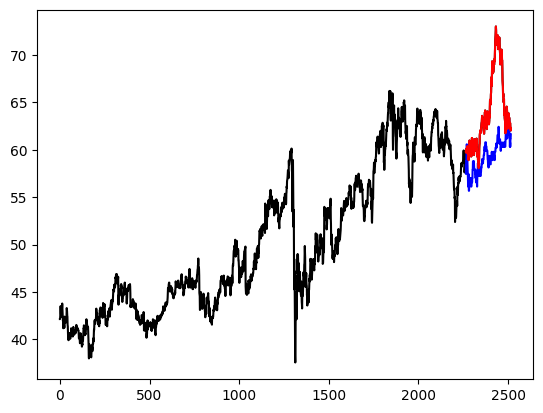

In [35]:
# plot the forecasted data together with the train data and the real test data

plt.plot(data_main.index, data_main["Close"], color="black", label="Train Data")
plt.plot(forecast_index, output[0][0], color="blue", label="Forecasted Data")
plt.plot(test_data.index, test_data["Close"], color="red", label="Test Data")

# SOTA in-sample anomaly detection

Test Data Anomalies:
[0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0]
Anomaly and time step: 102
Anomaly and time step: 111
Anomaly and time step: 115
Anomaly and time step: 124
Anomaly and time step: 127
Anomaly and time step: 149
Anomaly and time step: 152
Anomaly and time step: 166
Anomaly and time step: 191
Anomaly and time step: 197


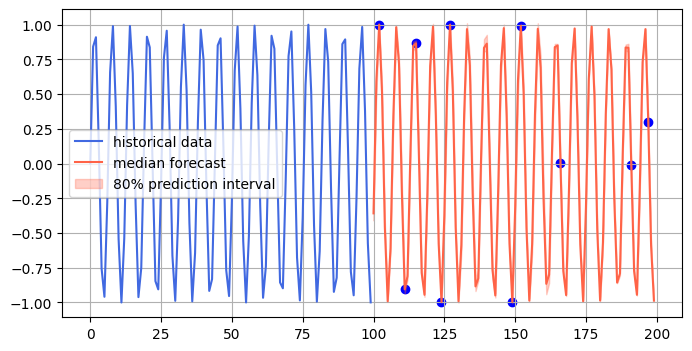

In [ ]:
from pyod.models.iforest import IForest

# Initialize the model
model = IForest()

# Fit the model on the training data
model.fit(median_chronos.reshape(-1, 1))

# Predict anomalies on the test data
prediction = model.predict(median_chronos.reshape(-1, 1))



print("Test Data Anomalies:")
print(prediction)


plt.figure(figsize=(8, 4))
plt.plot(train_data["Sin(X)"], color="royalblue", label="historical data")
plt.plot(forecast_index, median_chronos, color="tomato", label="median forecast")
for i, value in enumerate(prediction):
    if value == 1:
        print(f"Anomaly and time step: {len(train_data["Sin(X)"])+i}")
        plt.scatter(len(train_data["Sin(X)"])+i, median_chronos[i], color='blue', label="Predicted Anomaly" if i == 0 else "")
plt.fill_between(forecast_index, low, high, color="tomato", alpha=0.3, label="80% prediction interval")
plt.legend()
plt.grid()
plt.show()

# Prediction of Anomalies using Chronos

In [ ]:
# Use the anomalies_train dataset to put it into chronos and predict the next datapoints of the same length as the dataset



context = torch.tensor(anomalies_train, dtype=torch.bfloat16)
prediction_length = len(anomalies_train)
print(prediction_length)

quantiles, mean = pipeline.predict_quantiles(
    context=context,
    prediction_length=prediction_length,
    quantile_levels=[0.1, 0.5, 0.9],
)


_, median, _ = quantiles[0, :, 0], quantiles[0, :, 1], quantiles[0, :, 2]
print(median)


We recommend keeping prediction length <= 64. The quality of longer predictions may degrade since the model is not optimized for it. 


100
tensor([ 4.0403e-09,  4.0403e-09,  9.7219e-01,  4.0403e-09,  4.0403e-09,
        -9.7855e-01,  4.0403e-09,  4.0403e-09,  9.6371e-01,  4.0403e-09,
         4.0403e-09, -9.6371e-01,  4.0403e-09,  4.0403e-09,  9.5311e-01,
         4.0403e-09,  4.0403e-09, -9.6689e-01,  4.0403e-09,  4.0403e-09,
         9.5311e-01,  4.0403e-09,  4.0403e-09, -9.6265e-01,  4.0403e-09,
         4.0403e-09,  9.6159e-01,  4.0403e-09,  4.0403e-09, -9.6053e-01,
         4.0403e-09,  4.0403e-09,  9.6159e-01,  4.0403e-09,  4.0403e-09,
        -9.5523e-01,  4.0403e-09,  4.0403e-09,  9.4357e-01,  4.0403e-09,
         4.0403e-09, -9.4993e-01,  4.0403e-09,  4.0403e-09,  9.4251e-01,
         4.0403e-09,  4.0403e-09, -9.4887e-01,  4.0403e-09,  4.0403e-09,
         9.3720e-01,  4.0403e-09,  4.0403e-09, -9.4251e-01,  4.0403e-09,
         4.0403e-09,  9.2978e-01,  4.0403e-09,  4.0403e-09, -9.4569e-01,
         4.0403e-09,  4.0403e-09,  9.2660e-01,  4.0403e-09, -9.4691e-01,
         4.1670e-09,  4.1670e-09,  9.2285e-01, 

Index: 2, Value: 0.9092974268256817
Index: 5, Value: -0.9589242746631385
Index: 8, Value: 0.9893582466233818
Index: 11, Value: -0.9999902065507035
Index: 14, Value: 0.9906073556948704
Index: 17, Value: -0.9613974918795568
Index: 20, Value: 0.9129452507276277
Index: 24, Value: -0.9055783620066238
Index: 27, Value: 0.956375928404503
Index: 30, Value: -0.9880316240928618
Index: 33, Value: 0.9999118601072672
Index: 36, Value: -0.9917788534431158
Index: 39, Value: 0.9637953862840878
Index: 42, Value: -0.9165215479156338
Index: 46, Value: 0.9017883476488092
Index: 49, Value: -0.9537526527594719
Index: 52, Value: 0.9866275920404853
Index: 55, Value: -0.9997551733586199
Index: 58, Value: 0.9928726480845371
Index: 61, Value: -0.9661177700083929
Index: 64, Value: 0.9200260381967907
Index: 71, Value: 0.9510546532543747
Index: 74, Value: -0.9851462604682474
Index: 77, Value: 0.9995201585807313
Index: 80, Value: -0.9938886539233752
Index: 83, Value: 0.9683644611001854
Index: 86, Value: -0.923458447

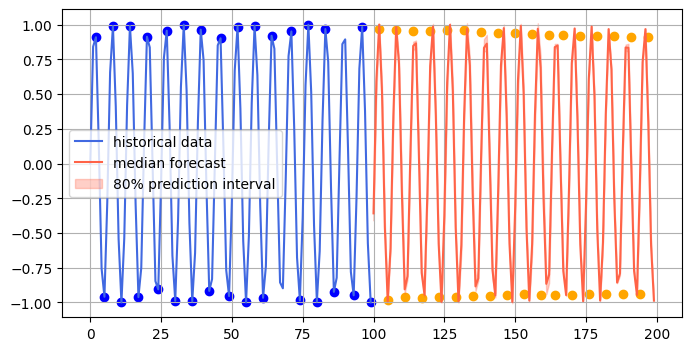

In [ ]:
# plot the values
indeces = range(0, len(median))


plt.figure(figsize=(8, 4))
plt.plot(train_data["Sin(X)"], color="royalblue", label="historical data")
plt.plot(forecast_index, median_chronos, color="tomato", label="median forecast")
for i, value in enumerate(anomalies_train):
    if value > 0.1 or value < -0.1:
        print(f"Index: {i}, Value: {value}")
        plt.scatter(i, train_data["Sin(X)"][i], color='blue', label="Predicted Anomaly" if i == 0 else "")

for i, value in enumerate(median): # We iterate over the predicted anomalies and save the current index
    if (value > 0.01 or value < -0.01): #and (median_chronos[i] > 0.9 or median_chronos[i] < -0.9): # if the value is an anomaly and the predicted value is also an anomaly
        print(f"Anomaly and time step: {len(train_data["Sin(X)"])+i}")
        plt.scatter(len(train_data["Sin(X)"])+i, value, color='orange', label="Predicted Anomaly" if i == 0 else "")
plt.fill_between(forecast_index, low, high, color="tomato", alpha=0.3, label="80% prediction interval")
plt.legend()
plt.grid()
plt.show()